<!-- # Análisis y Visualización de Datos del Triatlón Ironman

Este cuaderno explora los datos históricos del campeonato Ironman. A través de visualizaciones y análisis detallados, se estudian los tiempos, géneros y países participantes para comprender mejor las dinámicas de este evento deportivo.

## Descripción de los Datos
Los datos contienen información sobre los resultados del Ironman con las siguientes columnas:
- **Year**: Año del evento.
- **Place**: Posición final del atleta.
- **Athlete**: Nombre del atleta.
- **Country**: País del atleta.
- **Time**: Tiempo total registrado.
- **Gender**: Género del atleta.

--- -->


In [30]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

# Configuración de gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Cargar los datos
Cargamos los datos desde el archivo CSV proporcionado.

In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("emmanuelleai/iron-man-world-champhionship-allyears")

# print("Path to dataset files:", path)

100%|██████████| 3.20k/3.20k [00:00<00:00, 231kB/s]

Extracting files...
Path to dataset files: C:\Users\frany\.cache\kagglehub\datasets\emmanuelleai\iron-man-world-champhionship-allyears\versions\2


In [7]:
# Cargar datos
file_path = './data/ironman_results.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

## 2. Limpieza de datos

In [8]:
# Previsualización de los datos
data.head()

# Conversión de la columna 'Time' a formato de tiempo
data['Time'] = pd.to_timedelta(data['Time'])

# Generar una columna para tiempo en horas
data['Time (hrs)'] = data['Time'].dt.total_seconds() / 3600

# Resumen estadístico
data.describe()

,Year,Place,Time,Time (hrs)
count,252.000000,252.000000,252,252.000000
mean,1998.579365,1.992063,0 days 09:10:45.642857142,9.179345
std,12.024446,0.818083,0 days 01:04:35.103000742,1.076418
min,1978.000000,1.000000,0 days 07:51:13,7.853611
25%,1988.000000,1.000000,0 days 08:24:01.750000,8.400486
50%,1998.500000,2.000000,0 days 09:02:17.500000,9.038194
75%,2009.000000,3.000000,0 days 09:26:20.750000,9.439097
max,2019.000000,3.000000,0 days 15:40:59,15.683056


In [28]:
# Verificar el tipo de datos de la columna Time
print(data['Time'].dtype)

# Convertir el tiempo a segundos usando total_seconds()
data['Time_in_Seconds'] = data['Time'].apply(lambda x: pd.to_timedelta(x).total_seconds())

# Imprimir los primeros valores para verificar
print(data[['Time', 'Time_in_Seconds']].head())


object
              Time  Time_in_Seconds
0  0 days 07:51:13          28273.0
1  0 days 07:52:39          28359.0
2  0 days 08:01:40          28900.0
3  0 days 08:06:30          29190.0
4  0 days 08:14:40          29680.0


## 3. Visualización de datos

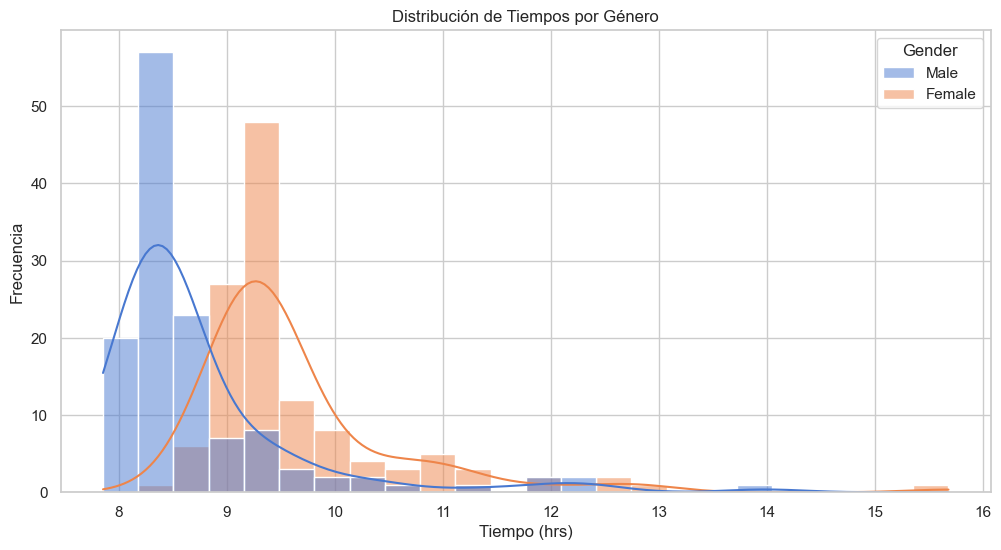

In [9]:
# visualización 1: de la distribución de tiempos
# Distribución de tiempos por género
plt.figure()
sns.histplot(data, x='Time (hrs)', hue='Gender', kde=True, palette='muted')
plt.title('Distribución de Tiempos por Género')
plt.xlabel('Tiempo (hrs)')
plt.ylabel('Frecuencia')
plt.show()



d:\Programs\Anaconda3\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


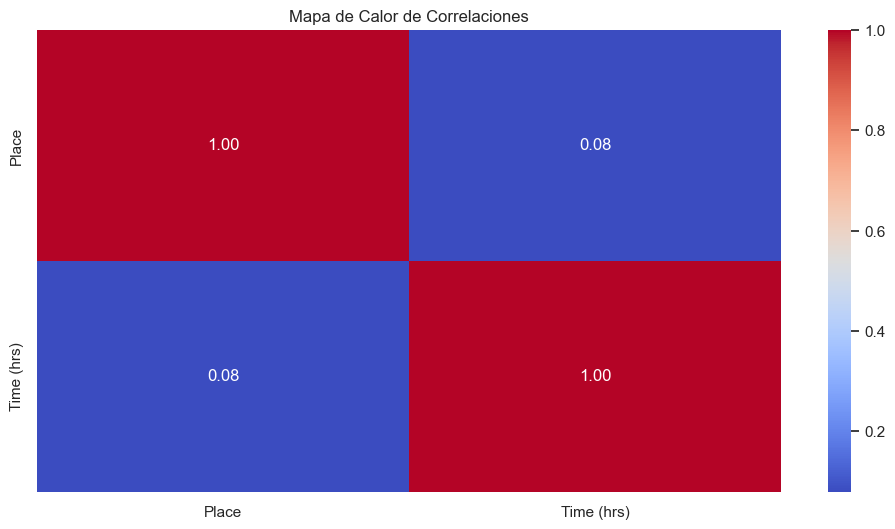

In [10]:
# visualización 2: de la distribución de tiempos por país
# Visualización interactiva: Tiempos por país
fig = px.box(data, x='Country', y='Time (hrs)', color='Gender',
             title='Distribución de Tiempos por País y Género')
fig.show()

# Mapa de calor de correlaciones
numeric_data = data[['Place', 'Time (hrs)']]
correlation = numeric_data.corr()

plt.figure()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlaciones')
plt.show()


In [11]:
# visualización 3: de la distribución de atletas por género y país
# Contar el número de atletas por género y país
data_grouped = data.groupby(['Country', 'Gender']).size().reset_index(name='Count')

# Crear el mapa Choropleth
fig = px.choropleth(
    data_grouped,
    locations="Country",  # Código del país
    locationmode="ISO-3",  # Modo de identificación usando códigos ISO Alpha-3
    color="Count",  # Número de atletas como color
    hover_name="Country",  # Nombre del país al pasar el cursor
    facet_col="Gender",  # Crear un mapa separado por género
    title="Distribución de atletas por género y país",
    color_continuous_scale="Plasma"  # Escala de colores
)

# Mostrar el mapa
fig.update_geos(showcountries=True, countrycolor="Black")
fig.show()


d:\Programs\Anaconda3\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [29]:
# visualización 4: de la matriz de dispersión

# Crear la matriz de dispersión
fig = px.scatter_matrix(
    data,
    dimensions=["Year", "Place", "Time_in_Seconds"],  # Variables de interés
    color="Gender",  # Diferenciar por género
    symbol="Country",  # Usar un símbolo diferente para cada país
    title="Matriz de dispersión del Ironman por género y país",
    labels={"Time_in_Seconds": "Tiempo (segundos)", "Place": "Lugar"}
)

# Mostrar la figura
fig.update_traces(diagonal_visible=False)  # Ocultar los histogramas diagonales si no son necesarios
fig.show()


In [33]:
data.columns

Index(['Year', 'Place', 'Athlete', 'Country', 'Time', 'Gender', 'Time (hrs)',
       'Time_in_Seconds'],
      dtype='object')

In [42]:
# Visualización 7: Densidad de Valores Promedios por País y Género
# Asumimos que 'data' ya contiene los datos principales
# Calcular el promedio por país y género
data_avg = data.groupby(['Country', 'Gender'], as_index=False)['Time (hrs)'].mean()

# Crear listas para los ejes X e Y basados en Género
x_values = data_avg[data_avg['Gender'] == 'Male']['Time (hrs)']  # Valores de hombres
y_values = data_avg[data_avg['Gender'] == 'Female']['Time (hrs)']  # Valores de mujeres

# Crear el gráfico de densidad con contornos
fig = ff.create_2d_density(
    x=x_values,
    y=y_values,
    colorscale='Greens',
    hist_color='rgba(100, 255, 120, 0.2)',
    point_size=2,
    title="Densidad de Valores Promedios: Hombres vs Mujeres"
)

# Mejorar la visualización
fig.update_layout(
    xaxis_title="Promedio de Valores (Hombres)",
    yaxis_title="Promedio de Valores (Mujeres)",
    template="plotly_white"
)

# Mostrar los nuevos datos en la consola o como parte del gráfico (por ejemplo, como anotación)
fig.add_annotation(
    x=0.5, y=0.5, xref="paper", yref="paper", text="Atleta: Jan Frodeno\nPais: GER\nTiempo: 7:51:13\nAño: 2019", 
    showarrow=False, font=dict(size=12, color="black"), align="center"
)

# Mostrar la gráfica
fig.show()


In [43]:
# Visualización 8: Comparación de Valores Promedios con Gráfica de Violín
# Crear la gráfica de violín
fig = px.violin(data, 
                y='Time (hrs)', 
                color='Gender', 
                box=True, 
                points="all",  # Muestra todos los puntos
                title="Comparación de Valores Promedios: Hombres vs Mujeres")

# Configuración de los ejes
fig.update_layout(
    xaxis_title="Género",
    yaxis_title="Valor Promedio",
    template="plotly_white"
)

# Mostrar la gráfica
fig.show()


d:\Programs\Anaconda3\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [44]:
# Visualización 9: Comparación de Valores Promedios por Pais con Gráfica de Violín
# Crear la gráfica de violín, separada por país y género
fig = px.violin(data, 
                y='Time (hrs)', 
                x='Country', 
                color='Gender', 
                box=True, 
                points="all",  # Muestra todos los puntos
                title="Comparación de Valores Promedios: Hombres vs Mujeres por País")

# Configuración de los ejes
fig.update_layout(
    xaxis_title="País",
    yaxis_title="Valor Promedio",
    template="plotly_white"
)

# Mostrar la gráfica
fig.show()

d:\Programs\Anaconda3\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [ ]:
# Visualización 10: Comparación de Valores Promedios por País y Género

# Calcular el promedio por país y género
data_avg = data.groupby(['Country', 'Gender'], as_index=False)['Time (hrs)'].mean()

# Crear un scatter plot con Plotly
fig = px.scatter(
    data_avg,
    x='Country',  # Eje X: Países
    y='Time (hrs)',       # Eje Y: Valor promedio
    color='Gender',  # Diferenciación por género
    size='Time (hrs)',    # Tamaño proporcional al valor
    hover_name='Country',  # Mostrar el nombre del país al pasar el cursor
    title="Comparación de Valores Promedios por País y Género",
    labels={
        'Country': 'País',
        'Time (hrs)': 'Valor Promedio',
        'Gender': 'Género'
    }
)

# Mejorar la visualización
fig.update_layout(
    xaxis_title="País",
    yaxis_title="Valor Promedio",
    legend_title="Género",
    xaxis=dict(tickangle=45),
    template="plotly_white"
)

# Mostrar la gráfica
fig.show()


d:\Programs\Anaconda3\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [47]:
# Visualización 11: Distribución de Valores Promedios por País y Género con Sunburst
# Calcular el valor promedio por país y género
promedio_por_pais_genero = data.groupby(['Country', 'Gender'])['Time (hrs)'].mean().reset_index()

# Crear una columna 'Valor Promedio' para usar en el gráfico Sunburst
promedio_por_pais_genero['Valor Promedio'] = promedio_por_pais_genero['Time (hrs)']

# Crear el gráfico Sunburst
fig = px.sunburst(promedio_por_pais_genero, 
                  path=['Country', 'Gender'], 
                  values='Valor Promedio',
                  title="Distribución de Valores Promedios: Hombres vs Mujeres por País")

# Configuración de la gráfica
fig.update_layout(
    template="plotly_white"
)

# Mostrar la gráfica
fig.show()